# ML in Cybersecurity: Tutorial II

Contents in this tutorial
  1. Scikit-learn Installation
  1. Loading and exploring data
  1. Classification


The content in this notebook is a compilation of many amazing existing tutorials. References below:
  - http://scikit-learn.org/stable/auto_examples/index.html
  - http://scikit-learn.org/stable/tutorial/basic/tutorial.html
  - https://markd87.github.io/articles/ml.html
  - https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
  

Course web-page: https://cms.cispa.saarland/mlcysecws2122/

Author:[Hossein Hajipour](https://cispa.saarland/people/hossein.hajipour/)   

### Installation

**Scikit-learn requires:**
 * Python (>= 2.7 or >= 3.4),
 * NumPy (>= 1.8.2),
 * SciPy (>= 0.13.3).
 
***Using pip***
>pip install -U scikit-learn

***Using conda***
>conda install scikit-learn

***More details:***
http://scikit-learn.org/stable/install.html

### Header

In [1]:
import time 
import numpy as np 
import matplotlib.pyplot as plt 

#Scikit-learn
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd
rnd_state = 42
from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2 

### Loading and exploring data


In [ ]:
# generate 2d classification dataset
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state = rnd_state)

#Print out size of the dataset
print("Size of the dataset: "+str(X.shape[0]))

#Print out some of the data
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y)) 
display(df[:10])

Size of the dataset: 200


,x1,x2,label
0,-1.049426,0.084443,0
1,0.922818,0.457489,0
2,0.656787,0.699597,0
3,1.188940,-0.386528,1
4,0.289265,-0.137745,1
5,0.251685,0.181006,1
6,-0.668121,0.822265,0
7,1.556266,-0.203446,1
8,1.872135,-0.125335,1
9,0.143229,0.953268,0


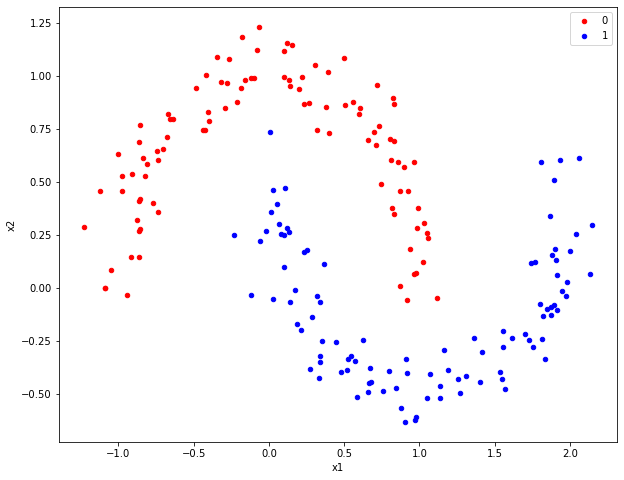

In [ ]:
#Visualizing the dataset

# scatter plot, dots colored by class value

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()



### Classification
#### Split data to the train and test set

In [ ]:

#
# 180 data item for training and 20 data for testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= rnd_state)
print(X_train.shape)
print(X_test.shape)

(180, 2)
(20, 2)


#### SVM Classifier

In [ ]:
#Linear kernel
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

#Polynomial kernel
svm_poly = svm.SVC(kernel='poly', degree = 3)
svm_poly.fit(X_train, y_train)

#Radial basis function kernel
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

/home/hossein/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hossein/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

##### Visualization

In [ ]:
def plot_decision_boundary(model,X,y,title):
    padding=0.15
    res=0.01
    
    #max and min values of x and y of the dataset
    x_min,x_max=X[:,0].min(), X[:,0].max()
    y_min,y_max=X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range=x_max-x_min
    y_range=y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    #create a meshgrid of points with the above ranges
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    plt.title(title, fontsize=16)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    #plot the original data and labels
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

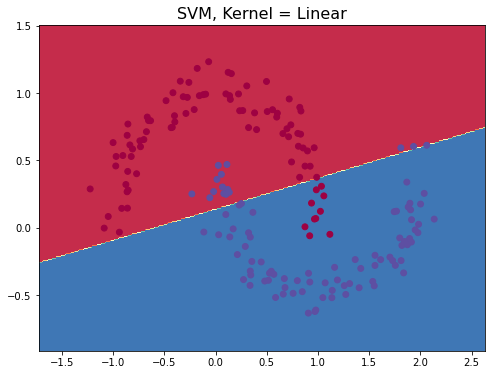

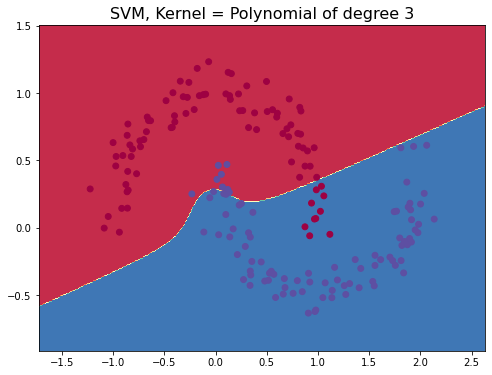

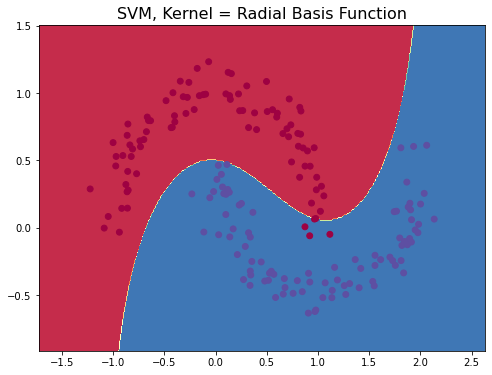

In [ ]:
plot_decision_boundary(svm_linear,X_train,y_train,"SVM, Kernel = Linear")
plot_decision_boundary(svm_poly,X_train,y_train,"SVM, Kernel = Polynomial of degree 3")
plot_decision_boundary(svm_rbf,X_train,y_train,"SVM, Kernel = Radial Basis Function")

##### Save the models

In [ ]:
#save the model
filename = 'svm_linear.pkl'
pickle.dump(svm_linear, open(filename, 'wb'))

#load the model
loaded_svm_linear = pickle.load(open(filename, 'rb'))

#Print out the prediction of the svm linear classifier
print(loaded_svm_linear.predict(X_test))
print(y_test)


[1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0]


##### Evaluation

In [ ]:
#SVM Kernel=Linear
y_predict_linear = svm_linear.predict(X_test)

#Print out predicted label and gt label
print(y_predict_linear)
print(y_test)


#SVM Kernel=Polynomial
y_predict_poly = svm_poly.predict(X_test)

#SVM Kernel=Radial Basis Function
y_predict_rbf = svm_rbf.predict(X_test)

#Print out the accuaracy of each model.
print(metrics.accuracy_score(y_test,y_predict_linear))
print(metrics.accuracy_score(y_test,y_predict_poly))
print(metrics.accuracy_score(y_test,y_predict_rbf))

[1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0]
0.9
0.9
0.95


#### K-nearest Neighbours Classifier

In [ ]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train, y_train)

knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50.fit(X_train, y_train) 

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

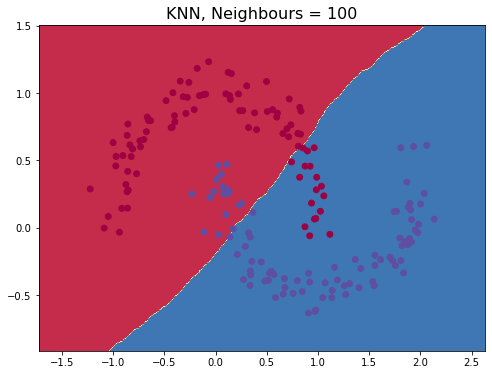

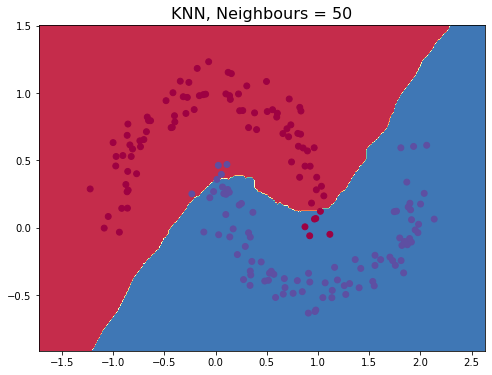

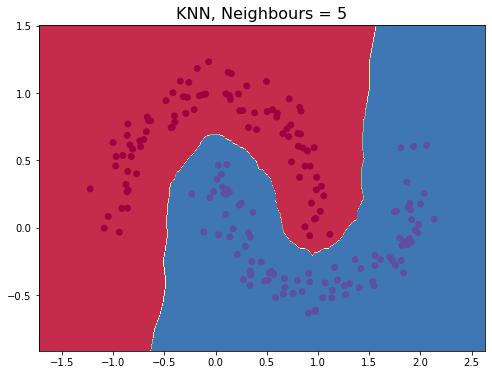

In [ ]:
#plot KNN model
plot_decision_boundary(knn_100,X_train,y_train,"KNN, Neighbours = 100")
plot_decision_boundary(knn_50,X_train,y_train,"KNN, Neighbours = 50")
plot_decision_boundary(knn_5,X_train,y_train,"KNN, Neighbours = 5")

##### Evaluation

In [ ]:
#KNN-100
y_predict_100 = knn_100.predict(X_test)

#Print out predicted label and gt label
print(y_predict_100)
print(y_test)

#KNN-50
y_predict_50 = knn_50.predict(X_test)

#KNN-5
y_predict_5 = knn_5.predict(X_test)

#Print out the accuaracy of each model.

print(metrics.accuracy_score(y_test,y_predict_100))
print(metrics.accuracy_score(y_test,y_predict_50))
print(metrics.accuracy_score(y_test,y_predict_5))

[1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0]
0.85
0.95
0.95
